\begin{center} 
Chun-Yuan (Scott) Chiu 
\end{center}

\begin{center} 
chunyuac@andrew.cmu.edu 
\end{center} 

# 1. {-}

## (a) {-}

First we write the OLS objective function part as
\begin{align*}
\lVert X^TY-\beta \rVert_2^2 &= (X^TY-\beta)^T(X^TY-\beta) \\
&= (Y^TX-\beta^T)(X^TY-\beta) \\
&= Y^TXX^TY - 2\beta^TX^TY + \beta^T\beta \\
&= Y^TXX^TY + \sum_{j=1}^p \left(\beta_j^2 - 2(X^TY)_j\beta_j\right). 
\end{align*}
where the third equation holds because $\beta^TX^TY$ is a scalar and is equal to its transpose $Y^TX\beta$. Thus for ridge regression we have 
\begin{align*}
\hat\beta_{ridge} &= \underset{\beta}{\text{argmin}} \lVert X^TY-\beta \rVert_2^2 + \lambda \lVert\beta \rVert_2^2 \\
&= \underset{\beta}{\text{argmin}} \left(Y^TXX^TY + \sum_{j=1}^p \left(\beta_j^2 - 2(X^TY)_j\beta_j\right) \right) + \lambda \sum_{j=1}^p\beta_j^2 \\
&= \underset{\beta}{\text{argmin}} \sum_{j=1}^p \left(\beta_j^2 - 2(X^TY)_j\beta_j\right) + \lambda \sum_{j=1}^p\beta_j^2 \\
&= \underset{\beta}{\text{argmin}} \sum_{j=1}^p \left((1+\lambda)\beta_j^2 - 2(X^TY)_j\beta_j\right).
\end{align*}
The $Y^TXX^TY$ term can be dropped because it does not depend on $\beta$. Similarly for the lasso we have
\begin{align*}
\hat\beta_{lasso} &= \underset{\beta}{\text{argmin}} \lVert X^TY-\beta \rVert_2^2 + \lambda \lVert\beta \rVert_1 \\
&= \underset{\beta}{\text{argmin}} \sum_{j=1}^p \left(\beta_j^2 - 2(X^TY)_j\beta_j\right) + \lambda \sum_{j=1}^p|\beta_j| \\
&= \underset{\beta}{\text{argmin}} \sum_{j=1}^p \left(\beta_j^2 - 2(X^TY)_j\beta_j + \lambda |\beta_j|\right).
\end{align*}

## (b) {-}

For ridge regression the objective function is a quadratic function of $\beta_j$. Completing the square shows that the minimizer is
\begin{align*}
\hat\beta_j = \frac{(X^TY)_j}{1+\lambda}. 
\end{align*}


For the lasso, the objective is non-differentiable at $\beta_j = 0$. If $\beta_j > 0$, it is $\beta_j^2 -(2(X^TY)_j - \lambda) \beta_j$ and the minimizer is $\hat \beta_j = (X^TY)_j - \lambda/2$, provided it is positive. If it is not, the minimizer is simply zero. Similarly, if $\beta_j \leq 0$, the objective function is $\beta_j^2 -(2(X^TY)_j + \lambda) \beta_j$ and the minimizer is $\hat \beta_j = (X^TY)_j + \lambda/2$ provided it is negative. If it is not, the minimizer is again zero. In summary, 
\begin{align*}
\hat\beta_j = \begin{cases}
(X^TY)_j - \lambda/2 &\mbox{ if } (X^TY)_j > \lambda/2\\
(X^TY)_j + \lambda/2 &\mbox{ if } (X^TY)_j < -\lambda/2\\
0 &\mbox{ otherwise } 
\end{cases}.
\end{align*}


## (c) {-}

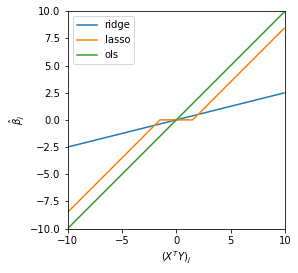

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame, Series

lam = 3

def lassoBetaj(z):
    if z > lam/2:
        return z - lam/2
    elif z < -lam/2:
        return z + lam/2
    else:
        return 0

ax = DataFrame([(z, z/(lam+1), lassoBetaj(z), z) for z in np.arange(-10, 10, 0.1)], columns=['x', 'ridge', 'lasso', 'ols']).set_index('x').plot()
ax.set(xlabel='$(X^TY)_j$', ylabel='$\hat\\beta_j$', xlim=[-10, 10], ylim=[-10, 10], aspect=1)
plt.show()

## (d) {-}

Setting $\lambda=0$ in either ridge or the lasso minimizer $\hat\beta_j$, we obtain the OLS minimizer $\hat \beta_j = (X^TY)_j$. As shown in the above figure, with $\lambda > 0$, both ridge and the lasso coefficient is smaller than the OLS one, but when the magnitude of $(X^TY)_j$ is large (much larger than $\lambda/2$), the magnitude of the corresponding lasso coefficient goes up in the same speed as the OLS one, while that of ridge regression goes up slower ($1/(\lambda+1)$ of the speed to be exact) and hence is smaller than the lasso coefficient. So ridge shrinks large coefficients more than lasso. 


On the other hand, when the magnitude of $(X^TY)_j$ is smaller than $\lambda/2$, the lasso regression shrinks a nonzero coefficient to zero, while ridge only divide it by $(\lambda +1)$, still nonzero. So, roughly speaking, the lasso regression has larger impact on small coefficients. 


From the figure it is also clear that, as we increase the value of $\lambda$, the lasso regression will shrink all coefficients to zero eventually. 





In [1]:
from scipy.stats import expon
from numpy import abs
import numpy as np

mean = 1
median = np.log(2)
n = 1000

rvs = expon.rvs(size=n)

print(((rvs - mean)**2).mean())    # mean squared error of the mean
print(((rvs - median)**2).mean())  # mean squared error of the median

1.075383043650204
1.1883149611307744


## (b) {-}

In contrast, considering the mean absolute prediction error, median is a (slightly) better estimator than mean. 

In [2]:
rvs = expon.rvs(size=n)

print((abs(rvs - mean)).mean())    # mean absolute error of the mean 
print((abs(rvs - median)).mean())  # mean absolute error of the median

0.7655840643978613
0.7291958553195591


# 2. {-}

## (a) {-}

Below is a plot of the loss function 
\begin{align*}
\mathcal L(Y, f(X)) &= b\left(e^{a(Y-f(X))} - a(Y-f(X)) - 1\right) \\
&= b\left(e^{az} - az - 1\right). 
\end{align*}

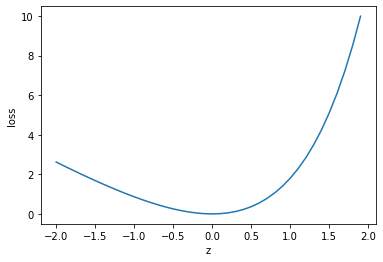

In [3]:
from numpy import exp
from pandas import DataFrame

a = 1.1
b = 2

loss = lambda z: b*(exp(a*z) - a*z -1)
    
ax = DataFrame([(x, loss(x)) for x in np.arange(-2, 2, 0.1)], columns=['z', 'loss']).set_index('z').plot(legend=None)
ax.set_ylabel('loss')
ax.set_xlabel('z');

This is known as the LINEX loss function. Roughly speaking, on the right (when $z>0$) the loss goes up exponentially with the absolute prediction error, while on the left ($z<0$) it only goes up linearly with the absolute prediction error. 

Note that $z = Y - f(X) > 0$ means $f(X)$ underestimates $Y$ while $z<0$ means $f(X)$ overestimates $Y$. We might choose to use this loss function when the consequences of underestimating are much more serious than overestimating. An example could be to estimate a bank's value at risk, where underestimating could result in insufficient reserve and a default event, while the only consequence of overestimating is slight inefficiency in funding and is minor. Another example is to predict the stock price at some point in time in the future and write a naked call option based on that prediction, in which case a serious underestimating of the stock price means the option expires deep in the money and the writer takes a huge loss, while overestimating simply means the writer could have collected more premium by writing an option with a lower strike. 

## (b) {-}

The expected loss is
\begin{align}
\mathbb E\mathcal L(Y, f(X)) &= \mathbb E[\mathbb E[ b(e^{a(Y-f(X))} - a(Y-f(X)) -1) |X]]\\
&= \mathbb E[b \mathbb E[e^{a(Y-f(X))}|X] - abE[Y-f(X)|X] -b]\\
&= \mathbb E[b e^{-af(X)}\mathbb E[e^{aY}|X] - abE[Y|X] + abf(X) -b], 
\end{align}
which is minimized when the integrand $b e^{-af(x)}\mathbb E[e^{aY}|X=x] - abE[Y|X=x] + abf(x) -b$ is minimized for a given $x$. 
Differentiate with respect to $f(x)$ and set to zero to get $-ab e^{f(x)}\mathbb E[e^{aY}|X=x] + ab = 0$, or equivalently 
\begin{align}
f(x) = \frac{1}{a}\log\mathbb E[e^{aY}|X=x]. 
\end{align}
Since $a, b > 0$, the second derivative of the integrand is $-ab e^{f(x)}\mathbb E[e^{aY}|X=x] < 0$. Thus we conclude that $f(x) = (\log\mathbb E[e^{aY}|X=x])/a$ minimizes the expected loss. 

## (c) {-}

Since $(Y|X=x) \sim N(\beta x, \sigma^2)$, we have $\mathbb E[e^{aY}|X=x] = e^{a\beta x + \frac12 a^2\sigma^2}$. Thus the optimal estimator $f(x)$ is 
\begin{align}
f(x) = \frac{1}{a}\log\mathbb E[e^{aY}|X=x] = \beta x + \frac{a}{2} \sigma^2.
\end{align}

## (d) {-}

Following the above result, the ```f_yours``` function is implemented to return ```beta*x + 0.5*a*sigma**2```. The simulation results are as below. 

In [4]:
!python asymm_loss.py

Average loss of the conditional expectation: 16.36
Average loss of your method: 4.49


The average loss computed using the optimal estimator $f(X) = \beta X + a\sigma^2/2$ is indeed much smaller than the average loss computed using the conditional expectation $\beta X$. Intuitively this makes sense because this version of the LINEX loss function we are looking at penalizes more when underestimating and the optimal estimator is larger than the conditional expectation by $a\sigma^2/2$. Because of this (positive) adjustment, the optimal estimator are less likely to underestimate. Without this adjustment, the conditional expectation is expected to underestimate more often than the optimal estimator and as a result makes the average loss larger. 

# 3. {-}

As the results shown below, the more useless additional variables there are, the larger the average mean squared prediction error is. Below 100 simulations are performed for each $p$. 

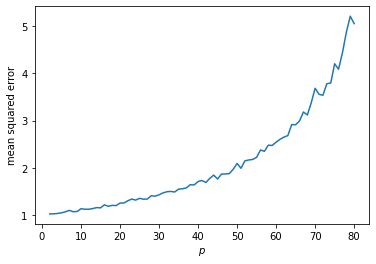

In [3]:
from scipy.stats import norm
from pandas import Series, DataFrame
import statsmodels.api as sm
import numpy as np

n_sim = 100

n = 100
m = 100
p = 2

def mse(p):
    trainX = DataFrame({'X%02d'%(i+1) : norm.rvs(size=n) for i in range(p)})
    trainY = 4*trainX['X01'] + norm.rvs(size=n)

    testX = DataFrame({'X%02d'%(i+1) : norm.rvs(size=m) for i in range(p)})
    testY = 4*testX['X01'] + norm.rvs(size=m)

    model = sm.OLS(exog=trainX, endog=trainY).fit()
    return ((testY - (testX @ model.params))**2).mean()
        
def avg_mse(p):
    return np.mean([mse(p) for _ in range(n_sim)])    

ax = Series({p: avg_mse(p) for p in range(2, 81)}).plot()
ax.set_ylabel('mean squared error')
ax.set_xlabel('$p$');